In [42]:
import torch
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader

In [32]:
#this has 10 test images and 90 train images of fox
# pose - postion - 16 values(4 x 4 matrix)
#c2value ( so we take only 3 values)

# so we have the postion for the test of the training data
# intrinsics of a matrix - focal length and principal point for the x and y of the axis
#  

In [ ]:
# we have assumed that pinhole camera is at the center
# - w/2 and - h/2 so 200 x 200 pixels gives 100-100 point(center of the image)


In [4]:
def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    # print(len(pos_file_naemes))
    # print(len(intrinsics_file_names))
    # print(len(img_file_names))

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        #poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        print(pose)
        
        #intrinsic = open(datapath + '/train/intrinsics/' + name).read().split()
        #intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
    
# we have now listed all the files

In [5]:
get_rays('fox')

['0.6859206557273865', '-0.32401347160339355', '0.6515582203865051', '7.358891487121582', '0.7276763319969177', '0.305420845746994', '-0.6141703724861145', '-6.925790786743164', '0.0', '0.8953956365585327', '0.44527140259742737', '4.958309173583984', '0.0', '0.0', '0.0', '1.0']
['-4.371138828673793e-08', '-0.9950000047683716', '0.09987492859363556', '0.9987491965293884', '1.0', '-4.349283244664548e-08', '4.365671824047013e-09', '0.0', '0.0', '0.09987492859363556', '0.9950000047683716', '9.949999809265137', '0.0', '0.0', '0.0', '1.0']
['-0.9057350754737854', '-0.37934067845344543', '0.18906259536743164', '1.890633463859558', '0.4238443076610565', '-0.8106328845024109', '0.40401774644851685', '4.0401740074157715', '0.0', '0.44606614112854004', '0.8949999809265137', '8.949999809265137', '0.0', '0.0', '0.0', '1.0']
['0.9541639685630798', '-0.26486659049987793', '0.13934408128261566', '1.3934388160705566', '0.29928427934646606', '0.8444351553916931', '-0.4442501962184906', '-4.4425024986267

In [ ]:
# so here pose values as 16 values as string we need to convert to numpy array
# so that we get it as 4x4 matrix
#so we use reshape
def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    # print(len(pos_file_naemes))
    # print(len(intrinsics_file_names))
    # print(len(img_file_names))

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        print(poses[i])
        break
        #intrinsic = open(datapath + '/train/intrinsics/' + name).read().split()
        #intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
    
# we have now listed all the files


In [7]:
get_rays('fox')

[[ 0.68592066 -0.32401347  0.65155822  7.35889149]
 [ 0.72767633  0.30542085 -0.61417037 -6.92579079]
 [ 0.          0.89539564  0.4452714   4.95830917]
 [ 0.          0.          0.          1.        ]]


In [23]:
# so here pose values as 16 values as string we need to convert to numpy array
# so that we get it as 4x4 matrix
#so we use reshape
def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)

        intrinsic = open(datapath + '/train/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)

        #read images
        name = img_file_names[i]
        img  = imageio.imread(datapath + '/imgs/' + name)
        
        print(img.shape)
        print(img)
        print(img.max())
        break
    
# we have now listed all the files


In [24]:
get_rays('fox')

(400, 400, 4)
[[[0 0 0 0]
  [1 1 1 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [1 1 1 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]
  ...
  [1 1 1 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1 1 1 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [1 1 1 0]]

 [[0 0 0 0]
  [1 1 1 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [0 0 0 0]]]
255


c:\Users\mrmoh\anaconda3\envs\Nerf\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


In [ ]:
# So here we can see that the images are of 4 channels and the max value is 255
# so we need to divide by 255 to get the values between 0 and 1

def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)

        intrinsic = open(datapath + '/train/intrinsics/' + name).read().split() 
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)

        #read images    
        name = img_file_names[i]
        img  = imageio.imread(datapath + '/imgs/' + name) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    print(images.shape)    

In [28]:
get_rays('fox')

c:\Users\mrmoh\anaconda3\envs\Nerf\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


(90, 400, 400, 4)


In [ ]:
#here the output we got is (90, 400, 400, 4)
#so we have 90 images of 400x400 and 4 channels
#where 90 is the number of images
# 400 is the height and 400 is the width

In [35]:
def get_rays(datapath, mode='train'):
    
    pose_file_names = [f for f in os.listdir(datapath + f'/{mode}/pose') if f.endswith('.txt')]
    intrisics_file_names = [f for f in os.listdir(datapath + f'/{mode}/intrinsics') if f.endswith('.txt')]
    img_file_names = [f for f in os.listdir(datapath + '/imgs') if mode in f]

    #here mode is for train or test
    

    assert len(pose_file_names) == len(intrisics_file_names)
    assert len(img_file_names) == len(pose_file_names)
    
    # Read
    N = len(pose_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pose_file_names[i]
        
        pose = open(datapath + f'/{mode}/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        
        intrinsic = open(datapath + f'/{mode}/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
        
        # Read images
        img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    
    H = images.shape[1] #height = 400
    W = images.shape[2] #width = 400 
    
    if images.shape[3] == 4: #RGBA -> RGB (so last dimension is alpha) we do blending
        #ie alpha blending to get RGB (alpha is the last dimension and opacity)
        images = images[..., :3] * images[..., -1:] + (1 - images[..., -1:])
        #so basically we take the RGB channel and multiply it with the alpha channel
        #(1 - images[..., -1:]) we do regularization ie we take the alpha channel and subtract it from 1
        #and then we add it to the RGB channel
        #this is done because black is 0 and white is 1 in the alpha channel

    plt.imshow(images[1])
    plt.show()

    print(images.shape)
    print(images.max())



    # rays_o = np.zeros((N, H*W, 3))
    # rays_d = np.zeros((N, H*W, 3))
    # target_px_values = images.reshape((N, H*W, 3))
    
    # for i in range(N):
        
    #     c2w = poses[i]
    #     f = intrinsics[i, 0, 0]

    #     u = np.arange(W)
    #     v = np.arange(H)
    #     u, v = np.meshgrid(u, v)
    #     dirs = np.stack((u - W / 2, -(v - H / 2), - np.ones_like(u) * f), axis=-1)
    #     dirs = (c2w[:3, :3] @ dirs[..., None]).squeeze(-1)
    #     dirs = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
        
    #     rays_d[i] = dirs.reshape(-1, 3)
    #     rays_o[i] += c2w[:3, 3]

    # return rays_o, rays_d, target_px_values


c:\Users\mrmoh\anaconda3\envs\Nerf\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


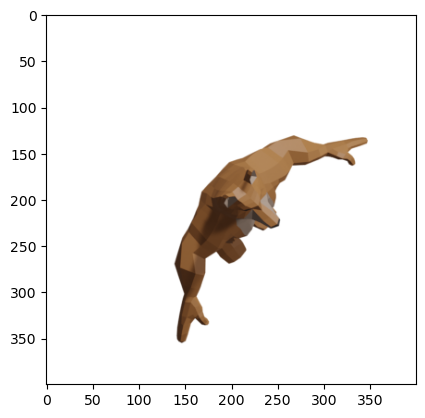

(90, 400, 400, 3)
1.0


In [36]:
get_rays('fox')

In [38]:
# Now we start generating the rays for the dataset so that we have same format as pose and intrinsics
def get_rays(datapath, mode='train'):
    
    pose_file_names = [f for f in os.listdir(datapath + f'/{mode}/pose') if f.endswith('.txt')]
    intrisics_file_names = [f for f in os.listdir(datapath + f'/{mode}/intrinsics') if f.endswith('.txt')]
    img_file_names = [f for f in os.listdir(datapath + '/imgs') if mode in f]

    #here mode is for train or test
    

    assert len(pose_file_names) == len(intrisics_file_names)
    assert len(img_file_names) == len(pose_file_names)
    
    # Read
    N = len(pose_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pose_file_names[i]
        
        pose = open(datapath + f'/{mode}/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        
        intrinsic = open(datapath + f'/{mode}/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
        
        # Read images
        img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    
    H = images.shape[1] #height = 400
    W = images.shape[2] #width = 400 
    
    if images.shape[3] == 4:
        images = images[..., :3] * images[..., -1:] + (1 - images[..., -1:])
    
    # this is for N dimensional array
    rays_o = np.zeros((N, H*W, 3))
    rays_d = np.zeros((N, H*W, 3))
    target_px_values = images.reshape((N, H*W, 3))
    
    for i in range(N):
        
        c2w = poses[i]
        f = intrinsics[i, 0, 0]

        u = np.arange(W)
        v = np.arange(H)
        u, v = np.meshgrid(u, v)
        dirs = np.stack((u - W / 2, -(v - H / 2), - np.ones_like(u) * f), axis=-1)
        dirs = (c2w[:3, :3] @ dirs[..., None]).squeeze(-1)
        dirs = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
        
        rays_d[i] = dirs.reshape(-1, 3)
        rays_o[i] += c2w[:3, 3]

    return rays_o, rays_d, target_px_values


In [ ]:
o, d, t = get_rays('fox')
#here o - origin, d - direction, t - target pixel values
# we will concatenate these arrays later for training

c:\Users\mrmoh\anaconda3\envs\Nerf\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


In [44]:
o[1]

array([[0.9987492 , 0.        , 9.94999981],
       [0.9987492 , 0.        , 9.94999981],
       [0.9987492 , 0.        , 9.94999981],
       ...,
       [0.9987492 , 0.        , 9.94999981],
       [0.9987492 , 0.        , 9.94999981],
       [0.9987492 , 0.        , 9.94999981]])

In [45]:
d[1]

array([[-0.24370196, -0.14673481, -0.95868569],
       [-0.24372814, -0.14601681, -0.95878865],
       [-0.24375419, -0.14529859, -0.95889114],
       ...,
       [ 0.04759063,  0.14459567, -0.9883457 ],
       [ 0.04758557,  0.14531419, -0.98824056],
       [ 0.04758048,  0.14603249, -0.98813491]])

In [46]:
t[1]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
batch_size = 1024
o, d, t = get_rays('fox', mode='train')
dataloader = DataLoader(torch.cat((torch.from_numpy(o),
                                    torch.from_numpy(d),
                                     torch.from_numpy(t)), dim=1), batch_size=batch_size, shuffle=True)


test_o, test_d, test_t = get_rays('fox', mode='test')

In [37]:
!"C:\Program Files\Git\bin\bash.exe" -c ls fox/train/pose

Camera-model.ipynb
Intro.ipynb
README.md
Volumetric-rendering part 2.ipynb
Volumetric-rendering-c2w.ipynb
Volumetric-rendering-optimization (1).ipynb
Volumetric-rendering-optimization.ipynb
Voxel-reconstruction.ipynb
__MACOSX
dataset.py
fox
simulator.py
volume-rendering.ipynb


In [ ]:
#  Camera / Dataset -loading the data set on generating arrays.

def get_rays(datapath, mode='train'):
    
    """
    Get rays from the directory datapath, mode can be 'train' or 'test'
    
    Parameters
    ----------
    datapath : str
        The root directory of the dataset
    mode : str
        The mode of the dataset, can be 'train' or 'test'
    
    Returns
    -------
    rays_o : torch.tensor
        The origin of the rays
    rays_d : torch.tensor
        The direction of the rays
    target_px_values : torch.tensor
        The RGB values of the target pixels
    """
    # listdir - list the files in the directory
    # endswith - check if the file ends with .txt


    # here we are reading the files or the data of pose and intrinsics
    # here we use the library os to read the files from the directory 

    # pos_file_naemes = os.listdir(datapath + '/train/pose')
    # intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')

    #asserts - check if the condition is true
    # ie in our case if the length of the pose file names is equal to the length of the intrinsics file names
    # and if the length of the image file names is equal to the length of the pose file names

    #image_file_names = [f for f in os.listdir(datapath + '/imgs') if 'train' in f]
    #here we iterate in the image file names and check if the mode is train
    # because we have both train and test data sets in the imgs folder
    
    #here we are iterating to remove any file that is not a text file
    # for both pose and intrinsics ( not needed actually )
    pose_file_names = [f for f in os.listdir(datapath + f'/{mode}/pose') if f.endswith('.txt')]
    intrisics_file_names = [f for f in os.listdir(datapath + f'/{mode}/intrinsics') if f.endswith('.txt')]
    img_file_names = [f for f in os.listdir(datapath + '/imgs') if mode in f]

    #here mode is for train or test
    

    assert len(pose_file_names) == len(intrisics_file_names)
    assert len(img_file_names) == len(pose_file_names)
    
    # Read
    N = len(pose_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pose_file_names[i]
        
        pose = open(datapath + f'/{mode}/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        
        intrinsic = open(datapath + f'/{mode}/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
        
        # Read images
        img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    
    H = images.shape[1]
    W = images.shape[2]
    
    if images.shape[3] == 4: #RGBA -> RGB
        images = images[..., :3] * images[..., -1:] + (1 - images[..., -1:])

    rays_o = np.zeros((N, H*W, 3))
    rays_d = np.zeros((N, H*W, 3))
    target_px_values = images.reshape((N, H*W, 3))
    
    for i in range(N):
        
        c2w = poses[i]
        f = intrinsics[i, 0, 0]

        u = np.arange(W)
        v = np.arange(H)
        u, v = np.meshgrid(u, v)
        dirs = np.stack((u - W / 2, -(v - H / 2), - np.ones_like(u) * f), axis=-1)
        dirs = (c2w[:3, :3] @ dirs[..., None]).squeeze(-1)
        dirs = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
        
        rays_d[i] = dirs.reshape(-1, 3)
        rays_o[i] += c2w[:3, 3]

    return rays_o, rays_d, target_px_values


In [4]:
# Rendering